### Importing librarys

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt



### Concatenate all 12 files of data in one

In [7]:
files = [file for file in os.listdir("./Sales_Data/")]

annual_data = pd.DataFrame()

for file in files:
    annual_data = pd.concat([annual_data, pd.read_csv("./Sales_Data/"+file)])

annual_data.to_csv("all_months_data.csv", index=False)

### Read the new file with all 12 months of data
- Why not use annual_data from above?

In [8]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


### Finding out what was the best month of sales and how much was earned in that month
- Why use the annual csv file instead of the files of each month?

##### Cleaning the data, excluding rows with null values and invalid values

In [9]:
all_data = all_data.drop(all_data[all_data["Order ID"] == "Order ID"].index)

all_data.dropna(inplace=True)

all_data = all_data.reset_index(drop=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Parsing the column "Order date" to date time format

In [10]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

/tmp/ipykernel_118415/2617628323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


#### Creating a new column "month"

In [11]:
all_data["Month"] = all_data["Order Date"].dt.month_name()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October


#### Converting columns "Price Each" and "Quantity Ordered" to numeric

In [12]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

#### Creating a new column "total price" (price each * quantity ordered)

In [13]:
all_data["Total Price"] = all_data["Quantity Ordered"] * all_data["Price Each"]

#### New data frame with the data I'm looking for

In [14]:
sales_by_month = all_data.groupby("Month").agg({"Total Price": "sum"})

sales_by_month.sort_values(by="Total Price", ascending=False, inplace=True)

sales_by_month = sales_by_month.reset_index()

sales_by_month.head()


,Month,Total Price
0,December,4613443.34
1,October,3736726.88
2,April,3390670.24
3,November,3199603.20
4,May,3152606.75


#### Ploting sales by month

Text(0.5, 1.0, 'Sales by month')

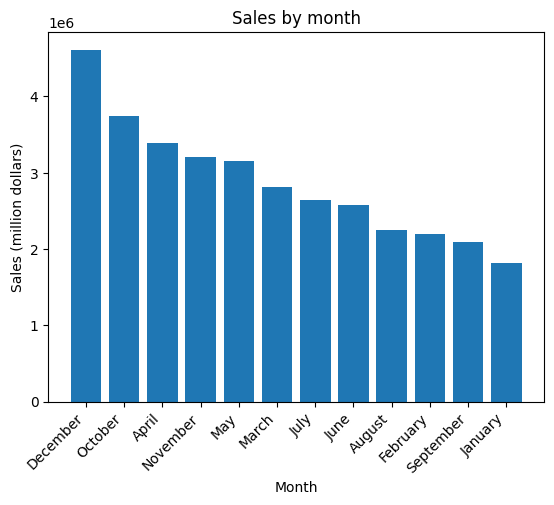

In [15]:
plt.bar(sales_by_month["Month"], sales_by_month["Total Price"])
plt.xticks(sales_by_month["Month"], rotation=45, ha="right")
plt.ylabel("Sales (million dollars)")
plt.xlabel("Month")

plt.title("Sales by month")

### Finding out what city had the highest number of sales

#### Creating City column

In [16]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    state_plus_code = address.split(",")[2]
    return state_plus_code.split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: (f"{get_city(x)}, {get_state(x)}"))

#### New dataframe with sales by city

In [17]:
sales_by_city = all_data.groupby("City").agg({"Total Price": "sum"})

sales_by_city = sales_by_city.reset_index()

sales_by_city.head()

,City,Total Price
0,"Atlanta, GA",2795498.58
1,"Austin, TX",1819581.75
2,"Boston, MA",3661642.01
3,"Dallas, TX",2767975.40
4,"Los Angeles, CA",5452570.80


#### Ploting sales by city

Text(0.5, 1.0, 'Sales by City')

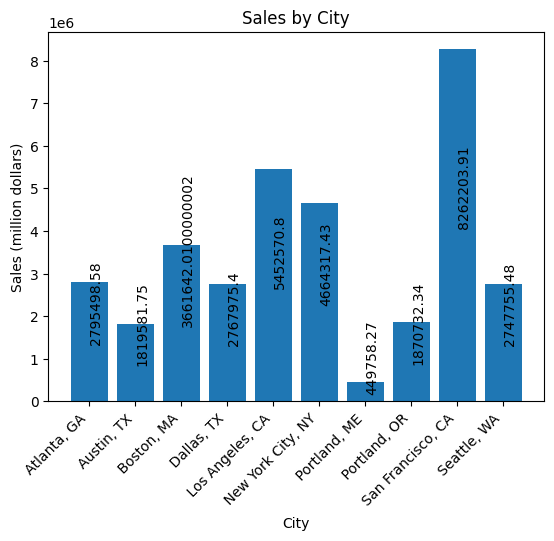

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,y[i], rotation="vertical")

plt.bar(sales_by_city["City"], sales_by_city["Total Price"])
plt.xticks(sales_by_city["City"], rotation=45, ha="right")
addlabels(sales_by_city["City"], sales_by_city["Total Price"])
plt.ylabel("Sales (million dollars)")
plt.xlabel("City")
plt.title("Sales by City")

### Finding out what products are most often sold together

### Finding out what product sold the most

#### New dataframe amout of sales by product

In [19]:
sales_by_product = all_data.groupby("Product").agg({"Quantity Ordered": "sum"})

sales_by_product = sales_by_product.reset_index()

sales_by_product.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


Text(0.5, 1.0, 'Product amount')

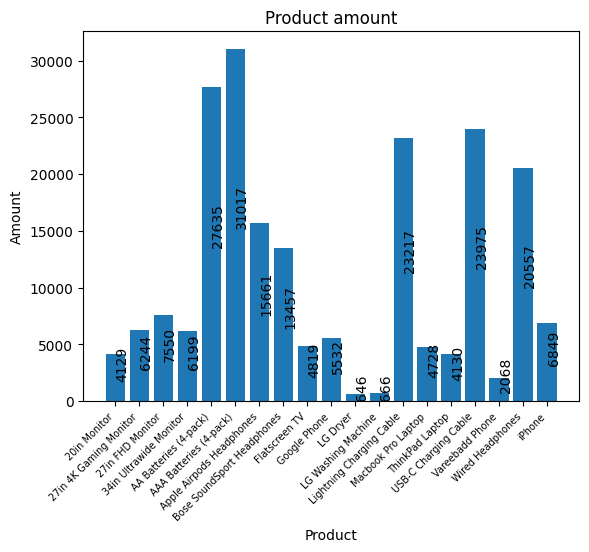

In [20]:
plt.bar(sales_by_product["Product"], sales_by_product["Quantity Ordered"])
plt.xticks(sales_by_product["Product"], rotation=45, ha="right", size=7)
addlabels(sales_by_product["Product"], sales_by_product["Quantity Ordered"])
plt.ylabel("Amount")
plt.xlabel("Product")
plt.title("Product amount")